In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [21]:
B_spots = list(range(13, 43)) + [3743, 3844, 3945, 4046, 4147, 4248] + list(range(43, 55)) + [4955, 5056, 5157, 5258, 5359, 5460] + list(range(55, 67)) + [6167, 6268, 6369, 6470, 6571, 6672] + list(range(67, 79)) + [7379, 7480, 7581, 7682, 7783, 7884] + list(range(79, 103))
C_spots = list(range(49, 97))
D_spots = list(range(1, 101))

spots_dict = {'B': B_spots, 'C': C_spots, 'D': D_spots}
levels_dict = {'B': 6, 'C': 6, 'D': 5}

In [26]:
def clean_and_read():
    files = os.listdir() 
    files = [f for f in files if f.endswith('.xlsx') if "Grupplista" in f]
    df = pd.read_excel(files[0])

    df = df[["Förnamn", "Efternamn", "Telefon 1", "Telefon 2", "Kommentar", "Referens", "Erlagt", "Belopp"]]

    df["Kommentar"] = df["Kommentar"].fillna("")
    df["Referens"] = df["Referens"].fillna("")
    df.loc[df["Kommentar"] == df["Referens"], "Referens"] = ""
    df["Kommentar"] = df["Kommentar"] + df["Referens"]
    df = df.drop("Referens", axis=1)

    df = df[df["Kommentar"] != ""]
    df["Kommentar"] = df["Kommentar"].str.replace(" ", "")

    df["Namn"] = df["Förnamn"] + " " + df["Efternamn"]
    df = df.drop(["Förnamn", "Efternamn"], axis=1)

    df["Betald"] = df["Erlagt"] >= df["Belopp"]
    df = df.drop(["Erlagt", "Belopp"], axis=1)

    df = df[["Namn", "Telefon 1", "Telefon 2", "Kommentar", "Betald"]]
    df = df.sort_values(by="Kommentar")

    return df

df = clean_and_read()
df

,Namn,Telefon 1,Telefon 2,Kommentar,Betald
22,Fredrik Friman,NaN,076-786 66 26,B100,True
80,Sten Andersson,NaN,073-973 10 91,B13,True
63,Niklas Wessman,072-233 85 26,072-233 85 26,B14,True
15,Edvin Gulle,073-673 69 76,073-673 69 76,B15,True
20,Eva Wallenius,08-659 70 92,070-286 82 05,B16,True
...,...,...,...,...,...
103,Christer Ledin,08-29 29 53,NaN,D94,True
163,Roland Johansson,08-36 84 08,070-580 01 59,D95,True
131,Kent Rydholm,08-647 11 54,NaN,D97,True
170,Thomas Åbonde,070-735 77 89,NaN,D98,True


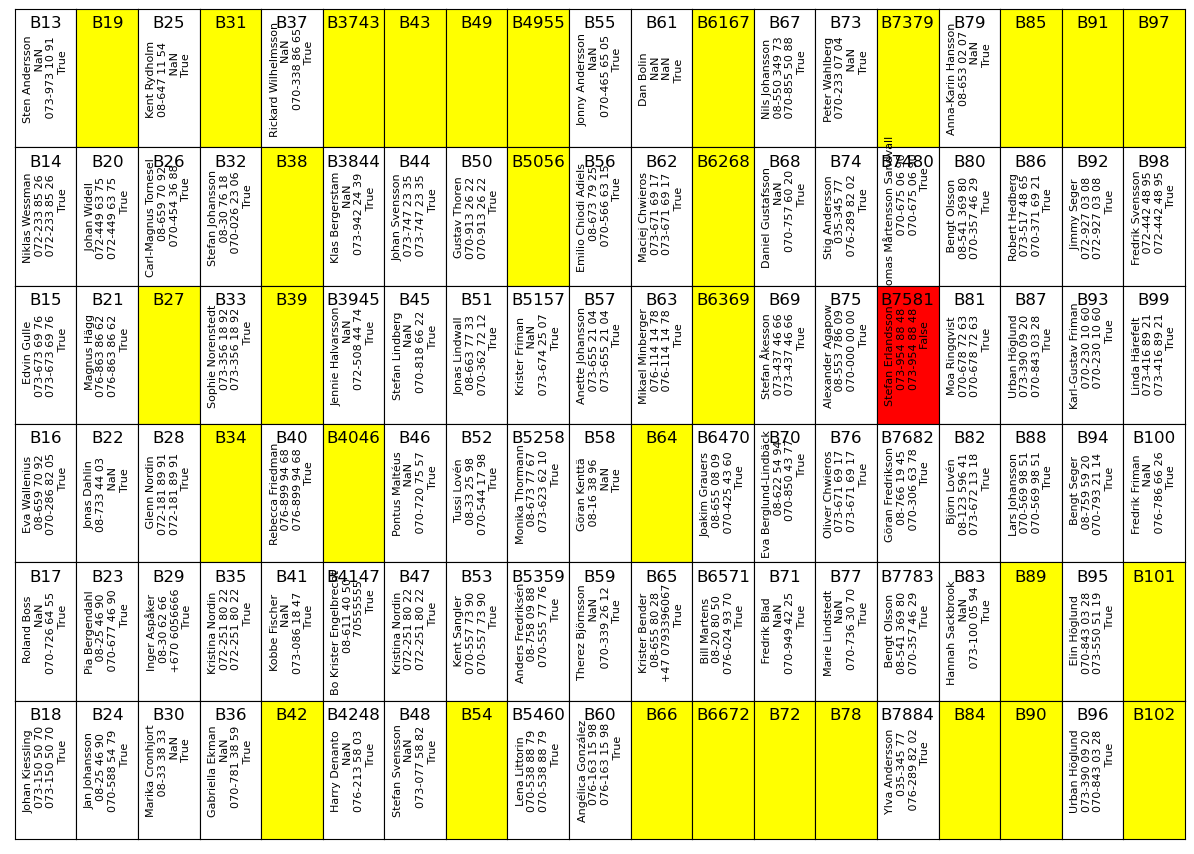

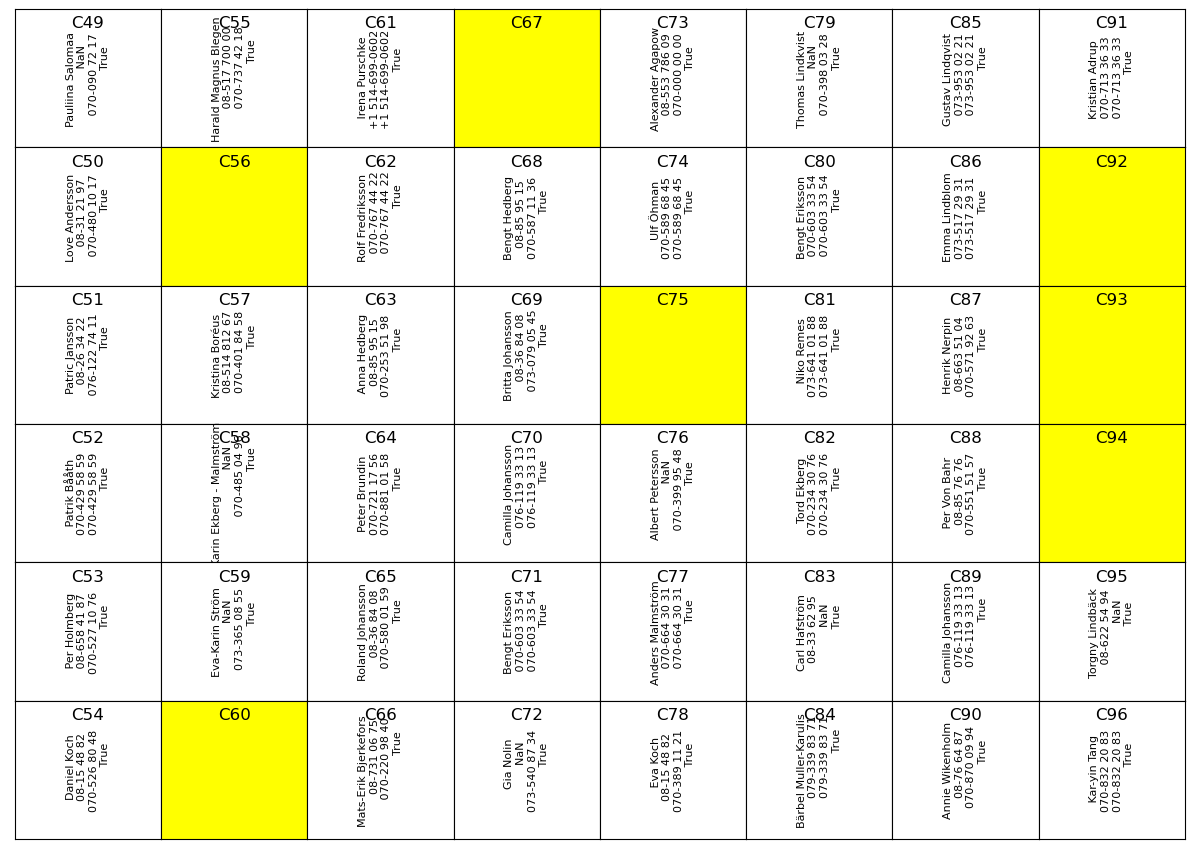

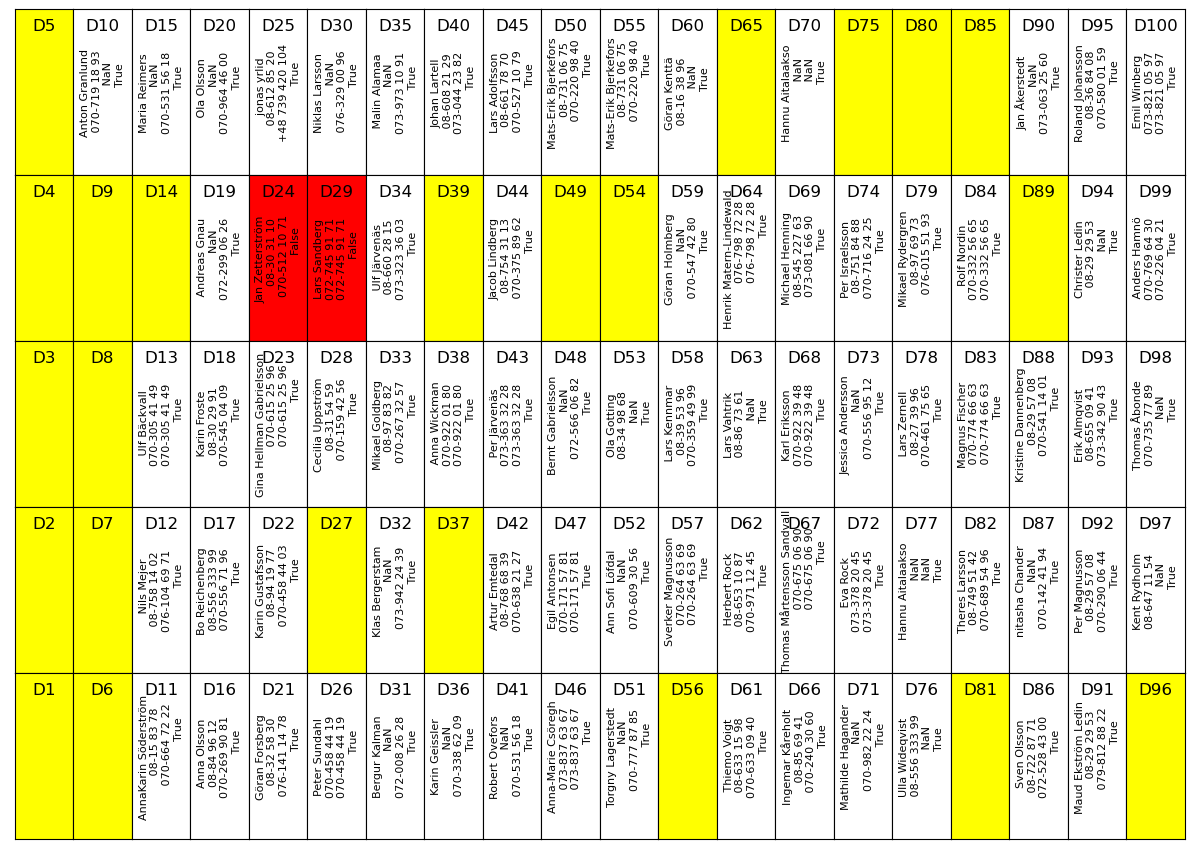

In [28]:
def full_summary(df):
    letters = df["Kommentar"].str[0].unique()
    for let in letters:
        sub_df = df[df["Kommentar"].str[0] == let]
        storage_summary(sub_df, let)

def storage_summary(df, letter):
    n_rows = levels_dict[letter]
    n_cols = int(np.ceil(len(spots_dict[letter]) / n_rows))
    spots = spots_dict[letter]

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(11.7, 8.3))  # A4 landscape

    for col in range(n_cols):
        for row in (range(n_rows)):
                
            idx = col * n_rows + row
            spot_name = letter + str(spots[idx])

            if letter == "D": # I D-förrådet räknas platserna nerifrån och upp
                row = n_rows - row - 1

            ax[row, col].text(0.5, 0.9, spot_name, ha="center", va="center", fontsize=12)
            if spot_name in df["Kommentar"].values:
                text = df[df["Kommentar"] == spot_name].drop(columns=["Kommentar"]).iloc[0].to_string(header=False, index=False)
                ax[row, col].text(0.5, 0.5, text, ha="center", va="center", wrap=True, fontsize=8, rotation=90)

                if not df[df["Kommentar"] == spot_name]["Betald"].values[0]: # Rödmarkera obetalda
                    ax[row, col].set_facecolor("red")
            else:
                ax[row, col].set_facecolor("yellow")
            ax[row, col].set_xticks([])  # Hide x-axis
            ax[row, col].set_yticks([])  # Hide y-axis

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
    plt.savefig(f"{letter} förråd.pdf", bbox_inches='tight')

full_summary(df)